**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: José Eduardo De Moraes López
*   MATRÍCULA: A01634782

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import os
DIR = "/content/drive/MyDrive/Maestría/DS"
os.chdir(DIR)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [45]:
df.info() #Método para obtener los tipo de datos
num_cols = df.select_dtypes(include=['number']).columns #separación variables númericas
cat_cols = df.select_dtypes(include=['object']).columns #separación variables cat
print("Número de columnas numéricas: ", len(num_cols))
print("Número de columnas cualitativas: ", len(cat_cols))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
Número de columnas numéricas:  

 2. Determina el porcentaje de valores faltantes por columna.

In [46]:
porcentaje_faltante = df.isnull().mean() * 100 #porcentaje de valores faltantes
print("Porcentaje de valores faltantes por columna\n", porcentaje_faltante)

Porcentaje de valores faltantes por columna
 person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [47]:
df[num_cols].describe() #Estadísticas descriptivas

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [48]:
skewness = df[num_cols].skew() #asímetria de las variables
print(skewness)

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64


In [49]:
curtosis = df[num_cols].kurtosis() #curtosis de las variables
print(curtosis)

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64


In [50]:
person_age_skewness = df['person_age'].skew() #forma variable person age
person_age_kurtosis = df['person_age'].kurtosis()

In [51]:
loan_int_rate_skewness = df['loan_int_rate'].skew() #forma variable loan_int_rate
loan_int_rate_kurtosis = df['loan_int_rate'].kurtosis()

In [52]:
print(f"Asimetría de person_age: {person_age_skewness}")
print(f"Curtosis de person_age: {person_age_kurtosis}")

print(f"Asimetría de loan_int_rate: {loan_int_rate_skewness}")
print(f"Curtosis de loan_int_rate: {loan_int_rate_kurtosis}")

Asimetría de person_age: 2.5813925261849846
Curtosis de person_age: 18.560824765312866
Asimetría de loan_int_rate: 0.2085503016908977
Curtosis de loan_int_rate: -0.6716091079813706


La variable person_age tiene una asimetría positiva de 2.58, indicando que la distribución está sesgada hacia la derecha, con más individuos jóvenes y menos de edad avanzada, además de una alta curtosis de 18.56, lo que sugiere la presencia de muchos valores extremos.

La variable loan_int_rate muestra una asimetría ligeramente positiva de 0.21, lo que implica que su distribución es casi simétrica, y una curtosis de -0.67, indicando menos valores extremos en comparación con una distribución normal.

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

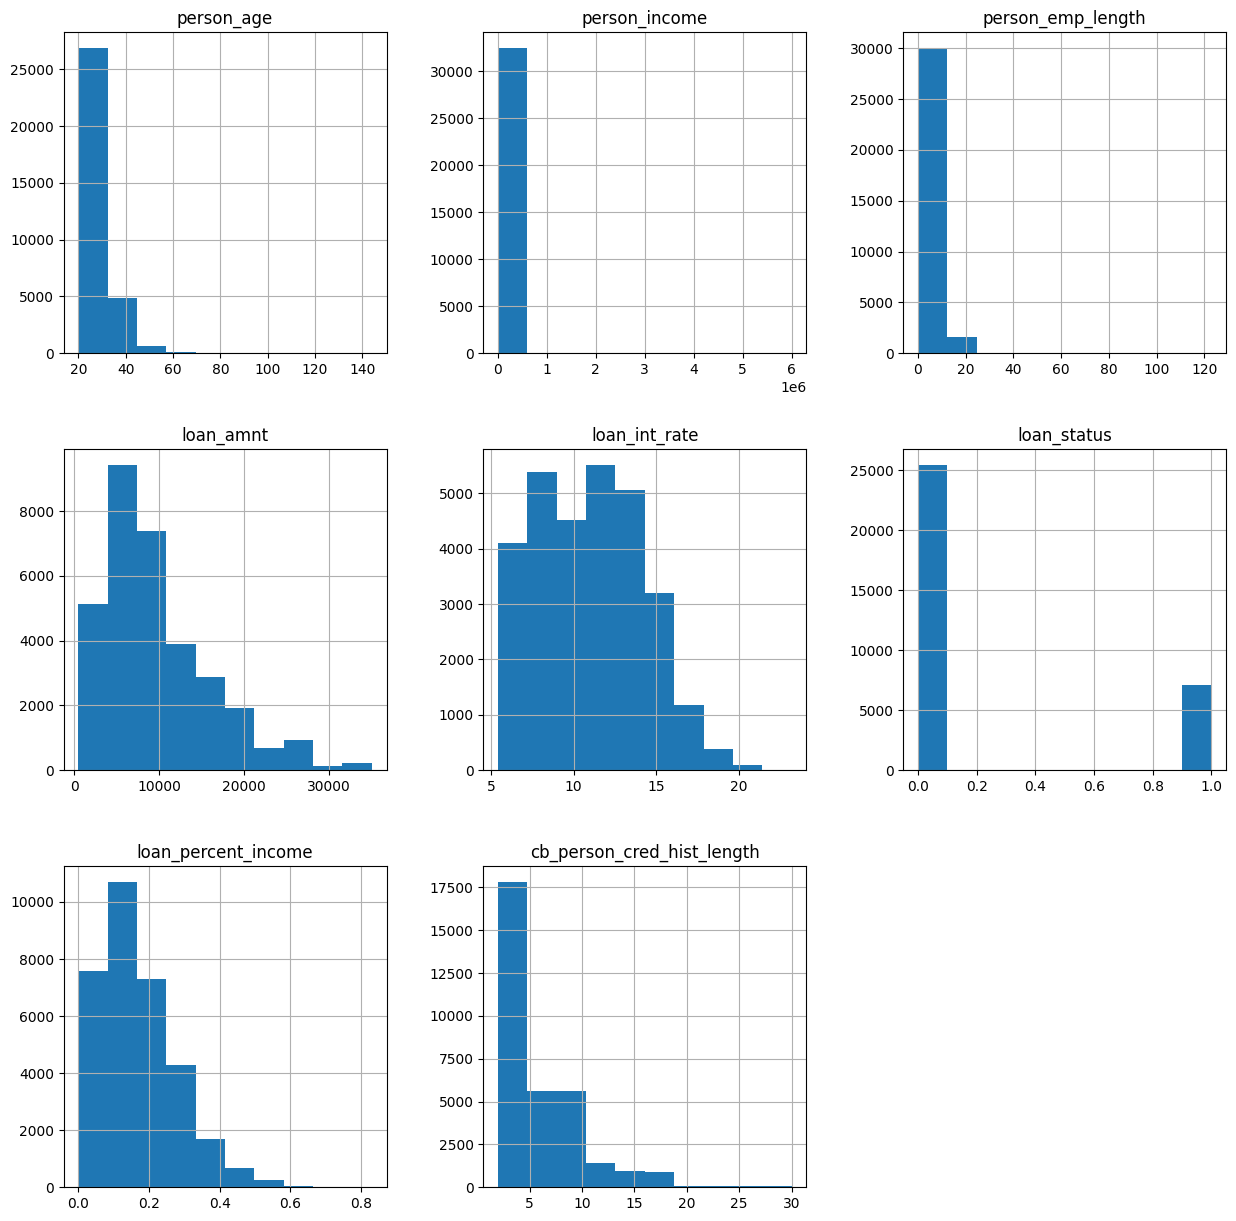

In [53]:
# Pandas Histogramas
df.hist(figsize=(15,15))
plt.show()

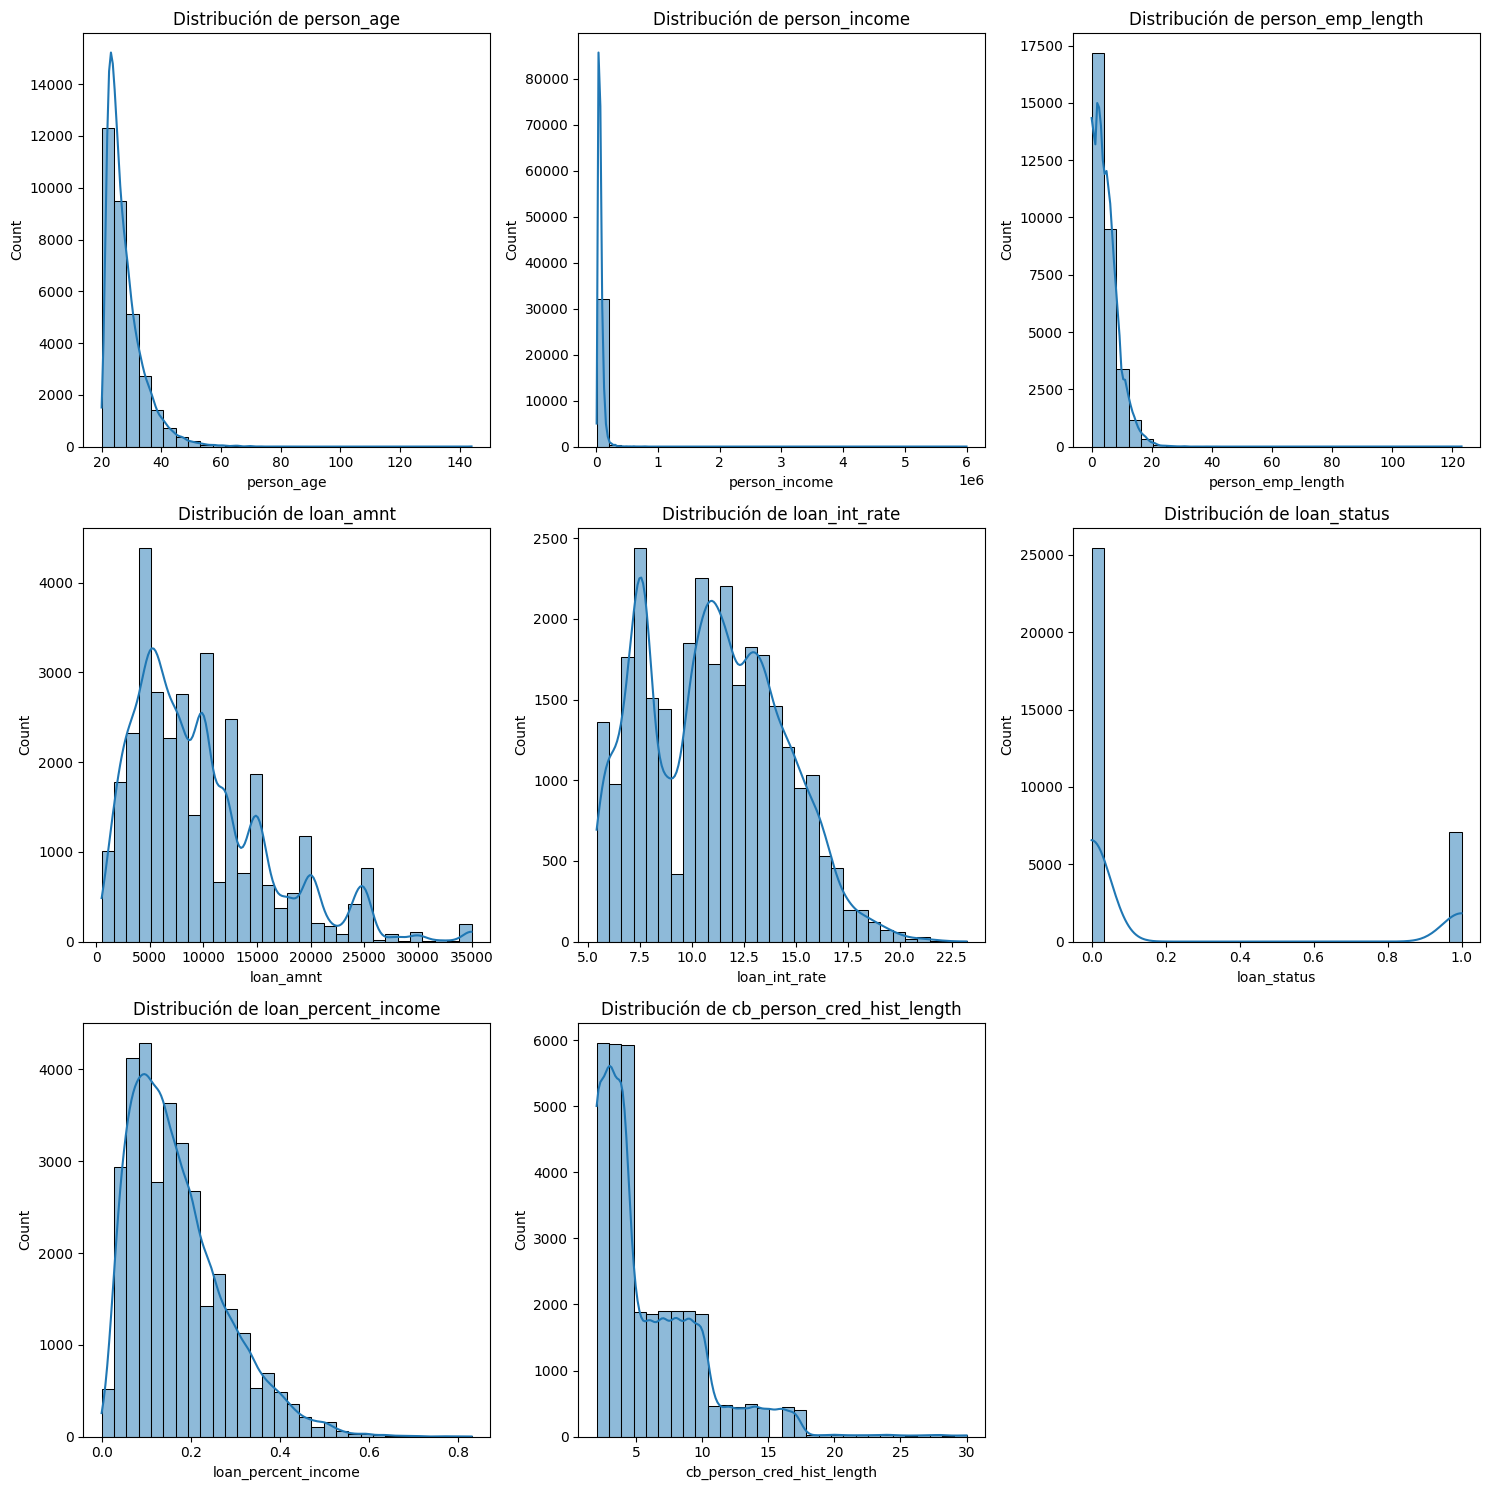

In [54]:
#Tamaño de la cuadrícula
num_cols_len = len(num_cols)
rows = (num_cols_len // 3) + 1

#Crear subplots con el número de filas y columnas
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  #Ajusta el tamaño de la figura
axes = axes.flatten()  #Aplanar la matriz de ejes para iterar más fácilmente

#Generar un histograma y un KDE para cada columna numérica
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribución de {col}')

#Ocultar las gráficas vacías
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

De acuerdo a los valores las variables tienen las siguientes caracteristicas

person_age: Asimetría: 2.58 (sesgo a la derecha). Curtosis: 18.56 (muchos outliers).

person_income: Asimetría: 32.87 (muy sesgado a la derecha). Curtosis: 2693.27 (muchos outliers).

person_emp_length: Asimetría: 2.61 (sesgo a la derecha). Curtosis: 43.72 (muchos outliers).

loan_amnt:Asimetría: 1.19 (sesgo a la derecha). Curtosis: 1.42 (normal).

loan_int_rate:Asimetría: 0.21 (ligeramente sesgado). Curtosis: -0.67 (menos outliers).

loan_status:Asimetría: 1.36 (sesgo a la derecha). Curtosis: -0.14 (normal).

loan_percent_income: Asimetría: 1.06 (sesgo a la derecha). Curtosis: 1.22 (normal).

cb_person_cred_hist_length: Asimetría: 1.66 (sesgo a la derecha). Curtosis: 3.72 (pocos outliers).

  Los resultados gráficos si parecen coincidir con los valores númericos obtenidos, claramente la interpretación númerica te da un entendimiento base del comportamiento de las variables pero es muy interesante ver el apartdado gráfico que es más visual y más sencillo de entender.

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

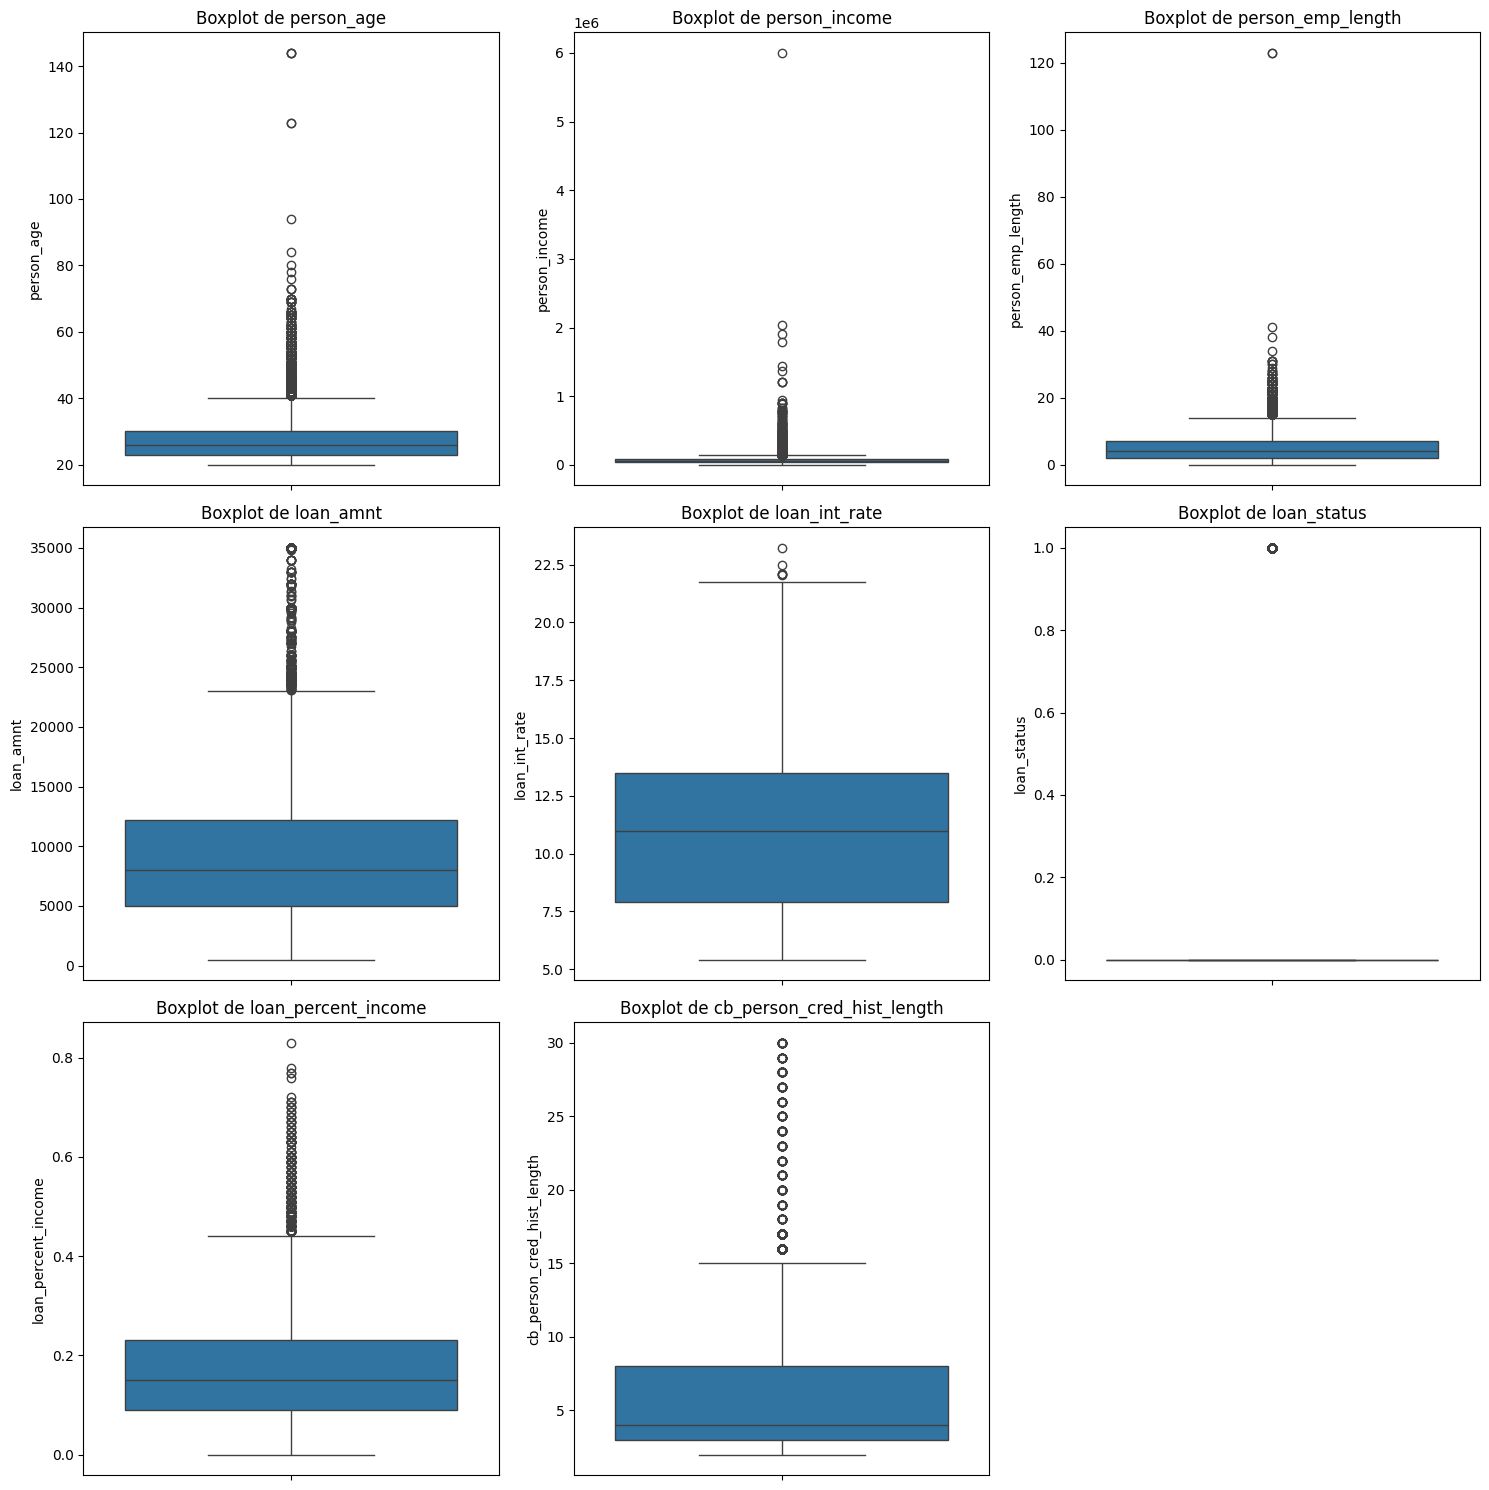

In [55]:
#Tamaño de la cuadrícula
num_cols_len = len(num_cols)
rows = (num_cols_len // 3) + 1

# Crear subplots con el número de filas y columnas
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  #Ajusta el tamaño de la figura
axes = axes.flatten()  #Aplanar la matriz de ejes para iterar más fácilmente

# Generar un boxplot para cada columna numérica
for i, col in enumerate(num_cols):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

#Ocultar las gráficas vacías
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [56]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [57]:
desc = df[cat_cols].describe(include = 'object') #resumen estadísticas descriptivas
desc

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [58]:
for col in df.select_dtypes(include='object').columns: #recuentos únicos de cada variable
    print(f"Recuentos para la columna {col}:")
    print(df[col].value_counts())
    print("\n")

Recuentos para la columna person_home_ownership:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64


Recuentos para la columna loan_intent:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


Recuentos para la columna loan_grade:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64


Recuentos para la columna cb_person_default_on_file:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64




7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

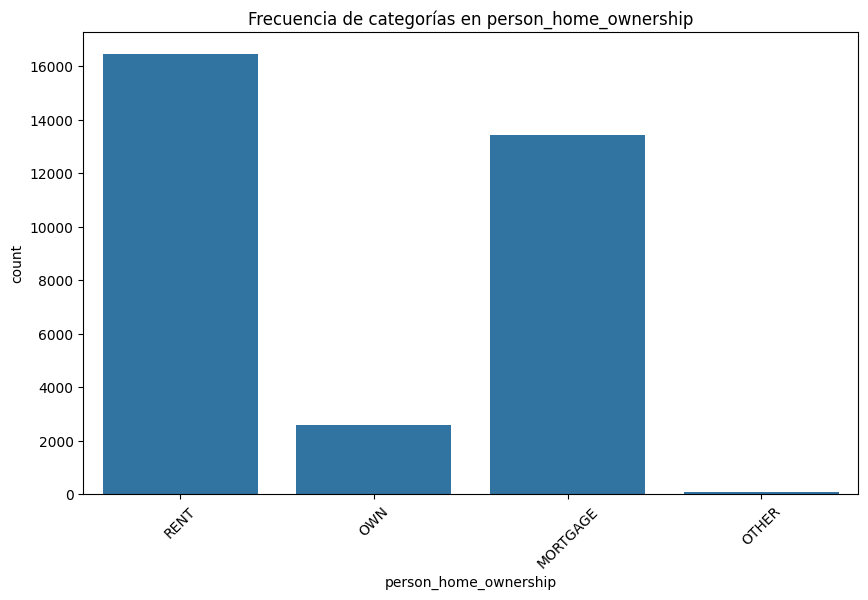

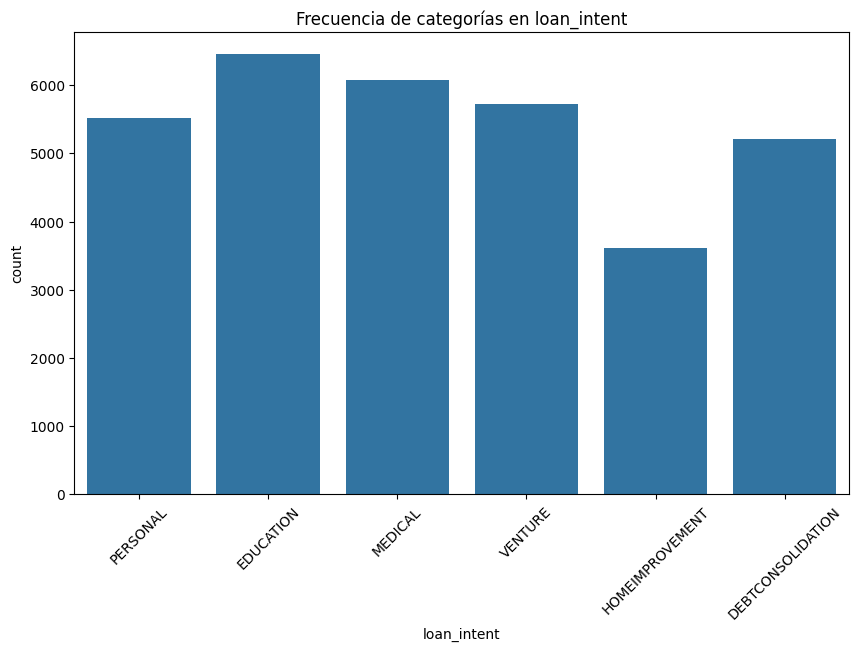

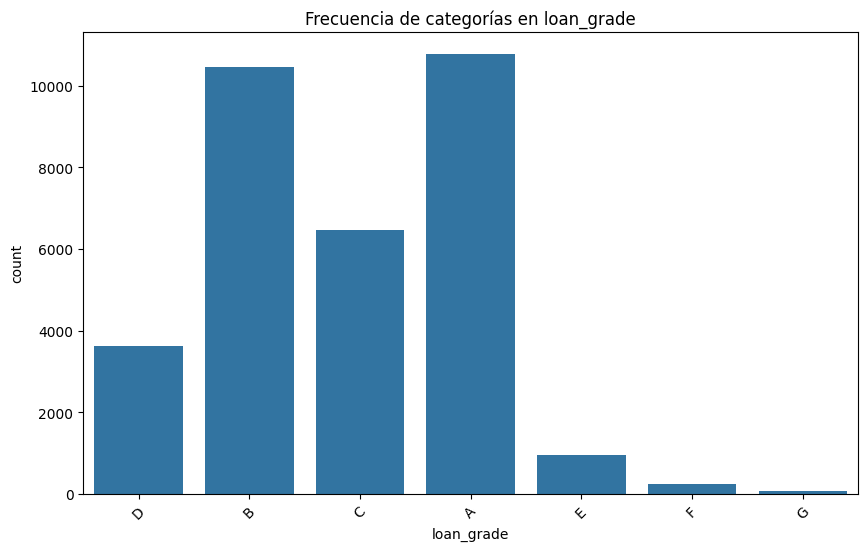

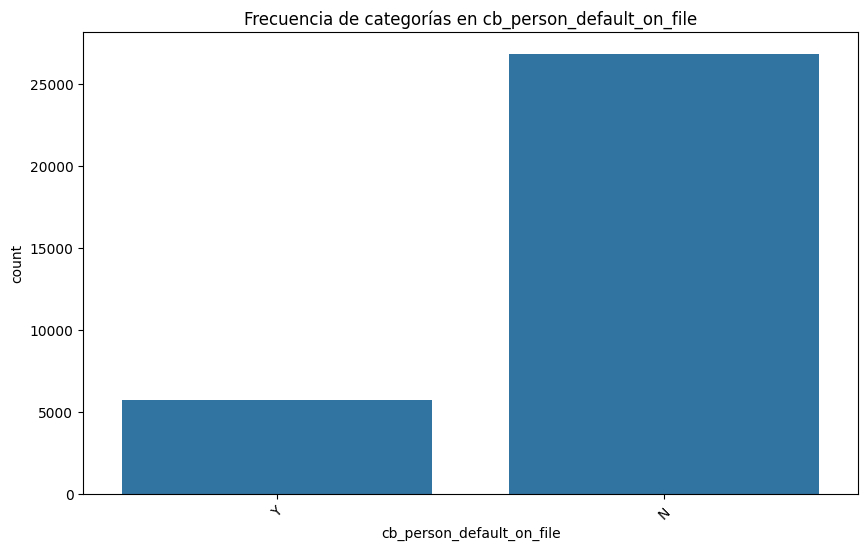

In [59]:
for col in df.select_dtypes(include='object').columns: #gráficas de barras de variables descriptivas con frecuencia
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Frecuencia de categorías en {col}')
    plt.xticks(rotation=45)
    plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


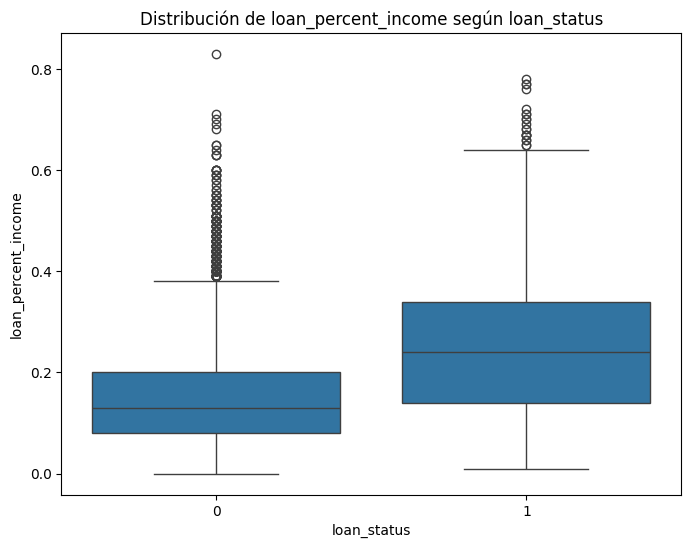

In [60]:
plt.figure(figsize=(8, 6)) #boxplots
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Distribución de loan_percent_income según loan_status')
plt.show()

Mientras mayor es el loan_percent_income el loan_status suele apegarse a 1. lo que quiere decir que loan_percent_income puede ser una variable con alta significancia en la variable de salida que es loan_status.

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


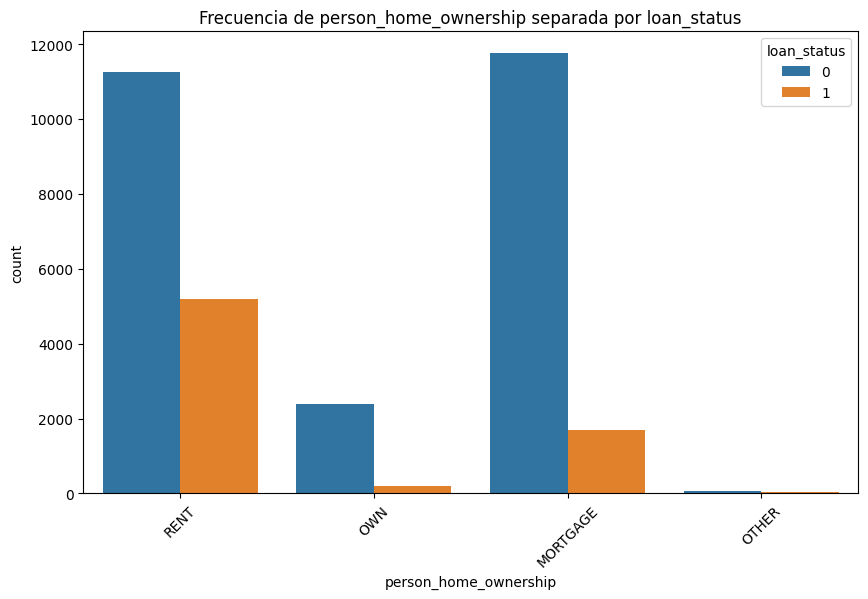

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


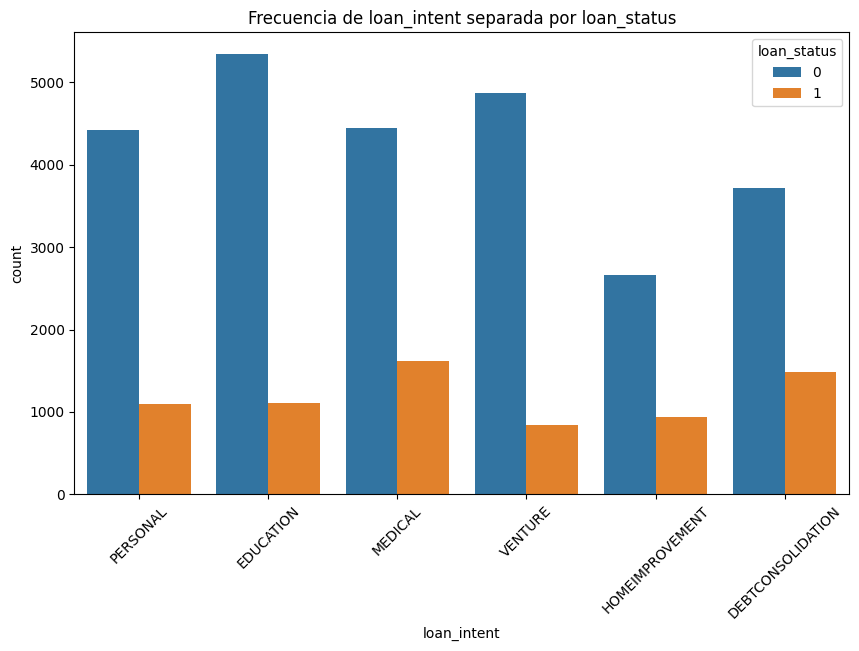

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


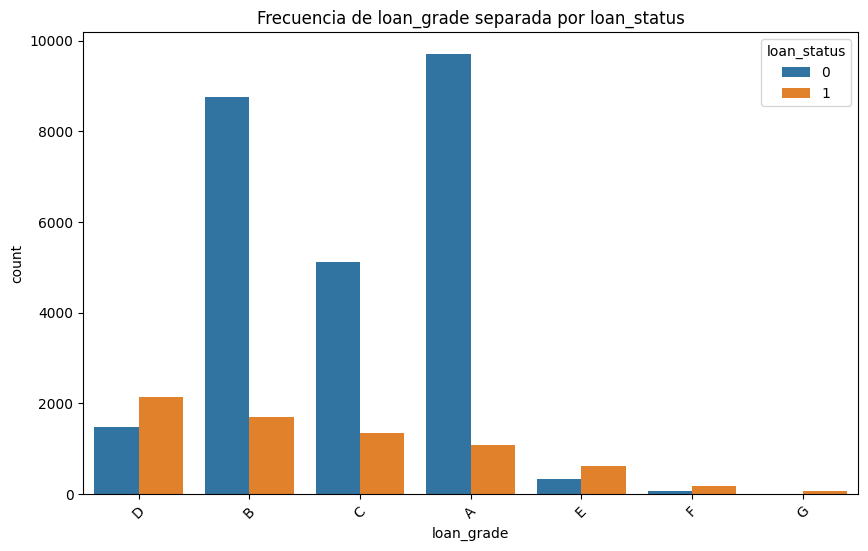

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


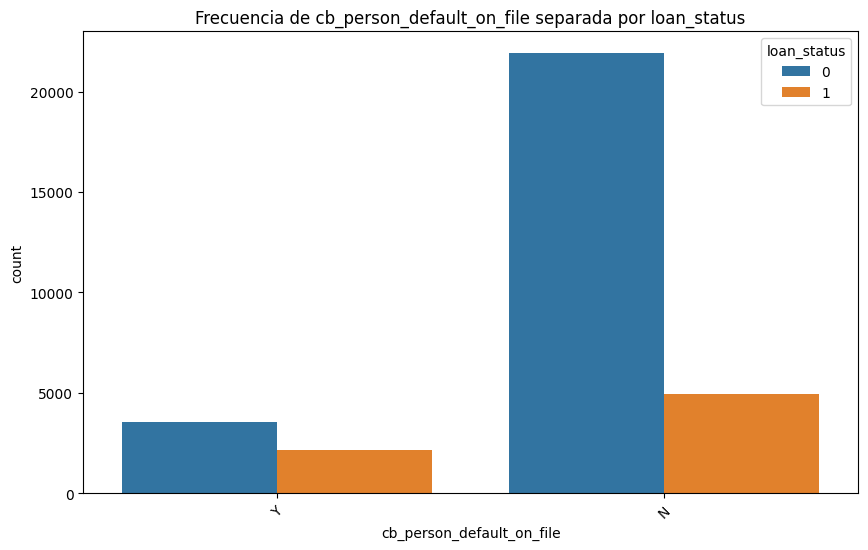

In [61]:
for col in df.select_dtypes(include='object').columns: #gráficas de barras que separa las frecuencias en base a load_status
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f'Frecuencia de {col} separada por loan_status')
    plt.xticks(rotation=45)
    plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

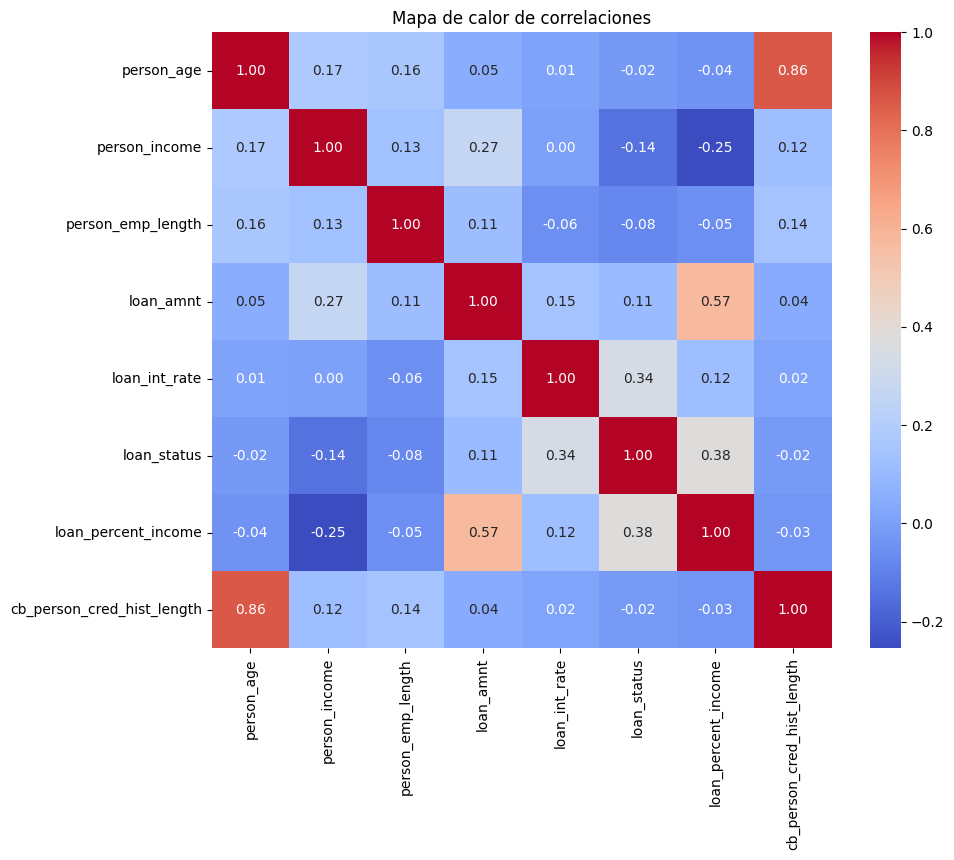

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.335133
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082489
person_income                -0.144449
Name: loan_status, dtype: float64


In [62]:
#variables númericas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones')
plt.show()

# Identificar la variable con mayor correlación con loan_status
correlation_with_loan_status = correlation_matrix["loan_status"].sort_values(ascending=False)
print(correlation_with_loan_status)

La variable con mayor correlación es loan_percent_income, en este caso es una correlación positiva, si loan_percent_income incrementa, loan_status como salida tiene más posibilidades de ser 1, es importante aclarar que no es la única variable significativa en este data frame, hay otras variables que támbien aportan ya sea de manera positiva o negativa a la salida.